# Final Project

# Decision Tree Likelihood Dataframe

# Create the DataFrame

In [1]:
from sklearn import tree
import pandas as pd
import os

In [2]:
# Create a reference to the CSV and import it into a Pandas DataFrame
csv_path = "Resources/student-por.csv"
students_df = pd.read_csv(csv_path)
students_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
students_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [4]:
students_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
# Drop unrelated columns and Walc
students_df = students_df.drop(['school','G1', 'G2', 'G3', 'Dalc'], axis=1)
students_df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,nursery,higher,internet,romantic,famrel,freetime,goout,Walc,health,absences
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,yes,yes,no,no,4,3,4,1,3,4
1,F,17,U,GT3,T,1,1,at_home,other,course,...,no,yes,yes,no,5,3,3,1,3,2
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,yes,yes,no,4,3,2,3,3,6
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,yes,yes,3,2,2,1,5,0
4,F,16,U,GT3,T,3,3,other,other,home,...,yes,yes,no,no,4,3,2,2,5,0


In [6]:
students_df.dtypes

sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Walc           int64
health         int64
absences       int64
dtype: object

In [7]:
students_df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,nursery,higher,internet,romantic,famrel,freetime,goout,Walc,health,absences
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,yes,yes,no,no,4,3,4,1,3,4
1,F,17,U,GT3,T,1,1,at_home,other,course,...,no,yes,yes,no,5,3,3,1,3,2
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,yes,yes,no,4,3,2,3,3,6
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,yes,yes,3,2,2,1,5,0
4,F,16,U,GT3,T,3,3,other,other,home,...,yes,yes,no,no,4,3,2,2,5,0


In [8]:
# perform get dummies on data set (less Walc) to binary encode for scaling
encoded_students_df = pd.get_dummies(students_df)
encoded_students_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Walc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,3,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,2,...,1,0,0,1,0,1,1,0,1,0


In [9]:
# keep encoded df clean from y data for prediction purposes
working_students_df = encoded_students_df.copy()
working_students_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Walc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,3,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,2,...,1,0,0,1,0,1,1,0,1,0


In [10]:
walc_col = working_students_df[['Walc']]
new_df = working_students_df.drop(['Walc'], axis=1)
new_df['Walc'] = walc_col
new_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,Walc
0,18,4,4,2,2,0,4,3,4,3,...,0,0,1,0,1,1,0,1,0,1
1,17,1,1,1,2,0,5,3,3,3,...,0,1,0,0,1,0,1,1,0,1
2,15,1,1,1,2,0,4,3,2,3,...,0,0,1,0,1,0,1,1,0,3
3,15,4,2,1,3,0,3,2,2,5,...,1,0,1,0,1,0,1,0,1,1
4,16,3,3,1,2,0,4,3,2,5,...,0,0,1,0,1,1,0,1,0,2


In [11]:
# Create the bins in which Drinking levels will be held
bins = [0,1,2,3,4,5]

# Create the names for the five bins
group_names = ["Not at all", "Slightly", "Moderately", "Very", "Extremely"]

In [12]:
# # Create column to contain new bins
new_df["Likelyhood to Drink"] = pd.cut(new_df["Walc"], bins, labels=group_names)
new_df = new_df.drop(['Walc'], axis=1)

new_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,Likelyhood to Drink
0,18,4,4,2,2,0,4,3,4,3,...,0,0,1,0,1,1,0,1,0,Not at all
1,17,1,1,1,2,0,5,3,3,3,...,0,1,0,0,1,0,1,1,0,Not at all
2,15,1,1,1,2,0,4,3,2,3,...,0,0,1,0,1,0,1,1,0,Moderately
3,15,4,2,1,3,0,3,2,2,5,...,1,0,1,0,1,0,1,0,1,Not at all
4,16,3,3,1,2,0,4,3,2,5,...,0,0,1,0,1,1,0,1,0,Slightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,5,...,1,1,0,0,1,0,1,1,0,Slightly
645,18,3,1,1,2,0,4,3,4,1,...,0,0,1,0,1,0,1,1,0,Not at all
646,18,1,1,2,2,0,1,1,1,5,...,1,0,1,0,1,1,0,1,0,Not at all
647,17,3,1,2,1,0,2,4,5,2,...,0,1,0,0,1,0,1,1,0,Very


In [13]:
target = new_df["Likelyhood to Drink"]
target_names = ["Not at all", "Slightly", "Moderately", "Very", "Extremely"]

In [14]:
data = new_df.drop("Likelyhood to Drink", axis=1)
feature_names = data.columns
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,3,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,3,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,3,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,5,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,5,...,1,0,0,1,0,1,1,0,1,0


In [16]:
new_df.isnull().sum()

age                    0
Medu                   0
Fedu                   0
traveltime             0
studytime              0
failures               0
famrel                 0
freetime               0
goout                  0
health                 0
absences               0
sex_F                  0
sex_M                  0
address_R              0
address_U              0
famsize_GT3            0
famsize_LE3            0
Pstatus_A              0
Pstatus_T              0
Mjob_at_home           0
Mjob_health            0
Mjob_other             0
Mjob_services          0
Mjob_teacher           0
Fjob_at_home           0
Fjob_health            0
Fjob_other             0
Fjob_services          0
Fjob_teacher           0
reason_course          0
reason_home            0
reason_other           0
reason_reputation      0
guardian_father        0
guardian_mother        0
guardian_other         0
schoolsup_no           0
schoolsup_yes          0
famsup_no              0
famsup_yes             0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target,random_state=10)

In [18]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.3006134969325153

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.3558282208588957

In [20]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.061551815587437594, 'goout'),
 (0.054694262323920835, 'absences'),
 (0.044962229993883725, 'age'),
 (0.044623377529081375, 'health'),
 (0.04432899145376298, 'freetime'),
 (0.04210602707755148, 'famrel'),
 (0.040267905959606796, 'Fedu'),
 (0.03989979936513254, 'Medu'),
 (0.03781054084417125, 'studytime'),
 (0.03328617302621034, 'traveltime'),
 (0.01925018337050266, 'activities_yes'),
 (0.01903453798849544, 'reason_course'),
 (0.018609627474848484, 'Fjob_services'),
 (0.018352431604491928, 'activities_no'),
 (0.01827184389332963, 'sex_M'),
 (0.017686521647268527, 'Mjob_services'),
 (0.017618034115576043, 'romantic_no'),
 (0.01743943191774382, 'Mjob_other'),
 (0.017436154510617686, 'sex_F'),
 (0.017216182193194998, 'romantic_yes'),
 (0.016784633205700013, 'Fjob_other'),
 (0.016688836501112136, 'famsup_yes'),
 (0.016241683221972014, 'reason_reputation'),
 (0.016180003263575982, 'reason_home'),
 (0.01603122271681376, 'nursery_no'),
 (0.015902021297559594, 'famsup_no'),
 (0.0152113698515

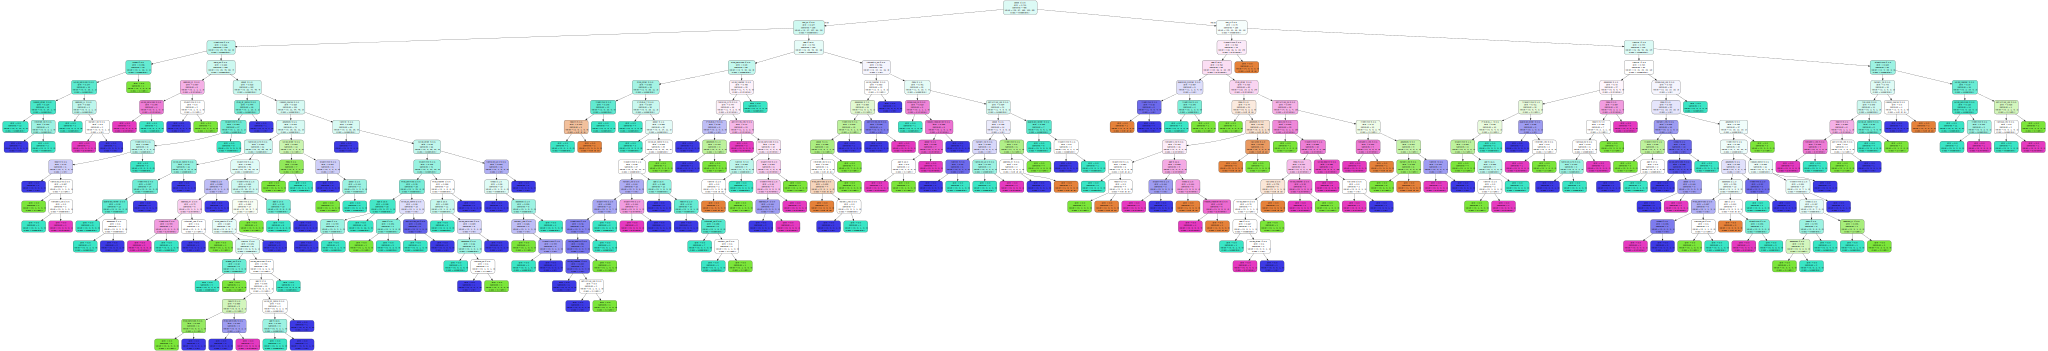

In [22]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Likelihood.png')

graph = graphviz.Source(dot_data)  
graph 

# Save Trained Model

In [ ]:
# Save the model
# model.save("voice_model_trained_2.h5")